In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load file

In [40]:
path = 'E:\PersonalFiles\杂项\Dissertation\Data/diabetes_data.csv'
with open(path, 'r') as f:
    df = pd.read_csv(path)
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [41]:
df.shape

(520, 17)

# Replace all Yes and Positive with 1, replace all No and Negative with 0

In [42]:
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 0)

df.iloc[:, 2:] = df.iloc[:, 2:].replace({'Yes':1, 'No':0, 'Positive':1, 'Negative':0})

In [43]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


# Analyze data

In [44]:
# Age max value: 90
df.iloc[:, 0] = df.iloc[:, 0] / 90

In [45]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.533654,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.135016,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.177778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.433333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.527778,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.633333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
df.describe()[1:3]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
mean,0.533654,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,0.135016,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973


* Check missing value and NA value

In [47]:
df.isna().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

* Check unbalance: Not extreme

In [48]:
df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

* Radar map

In [49]:
df_positive = df[df['class']==1]
df_negative = df[df['class']==0]
print(df_negative.shape)

(200, 17)


In [50]:
df_positive_count = df_positive.iloc[:, 1:16].apply(lambda x: x.value_counts())
df_negative_count = df_negative.iloc[:, 1:16].apply(lambda x: x.value_counts())
df_positive_count

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,173,77,95,132,102,131,237,145,166,210,167,128,185,242,259
1,147,243,225,188,218,189,83,175,154,110,153,192,135,78,61


In [51]:
df_positive_ratio = df_positive_count.iloc[1] / df_positive.shape[0] * 100
df_negative_ratio = df_negative_count.iloc[1] / df_negative.shape[0] * 100

In [52]:
df_positive_ratio

Gender                45.9375
Polyuria              75.9375
Polydipsia            70.3125
sudden weight loss    58.7500
weakness              68.1250
Polyphagia            59.0625
Genital thrush        25.9375
visual blurring       54.6875
Itching               48.1250
Irritability          34.3750
delayed healing       47.8125
partial paresis       60.0000
muscle stiffness      42.1875
Alopecia              24.3750
Obesity               19.0625
Name: 1, dtype: float64

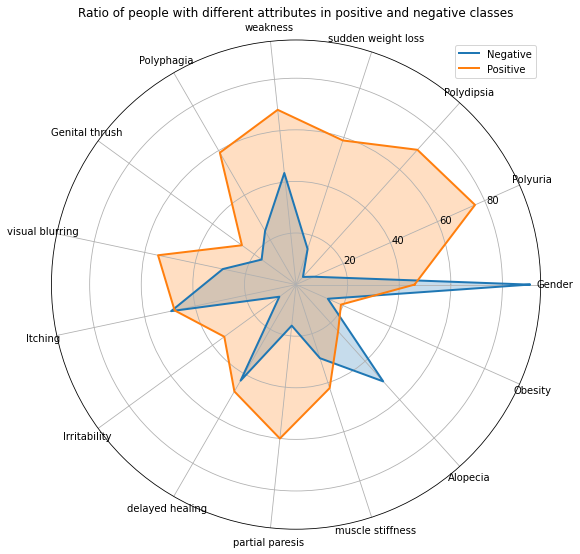

In [53]:
labels = df_positive_count.columns.values
labels=np.concatenate((labels,[labels[0]]))

stats_positive = np.concatenate((df_positive_ratio,[df_positive_ratio[0]]))
stats_negative = np.concatenate((df_negative_ratio,[df_negative_ratio[0]]))

angles=np.linspace(0, 2*np.pi, len(labels)-1, endpoint=False).tolist()
angles = np.concatenate((angles, [angles[0]]))

fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))
ax.plot(angles, stats_negative, linewidth=2, label='Negative')
ax.fill(angles, stats_negative, alpha=0.25)
ax.plot(angles, stats_positive, linewidth=2, label='Positive')
ax.fill(angles, stats_positive, alpha=0.25)

ax.set_thetagrids(np.degrees(angles[:-1]), labels[:-1])

plt.title('Ratio of people with different attributes in positive and negative classes')
plt.legend()
plt.show()

* Heat map

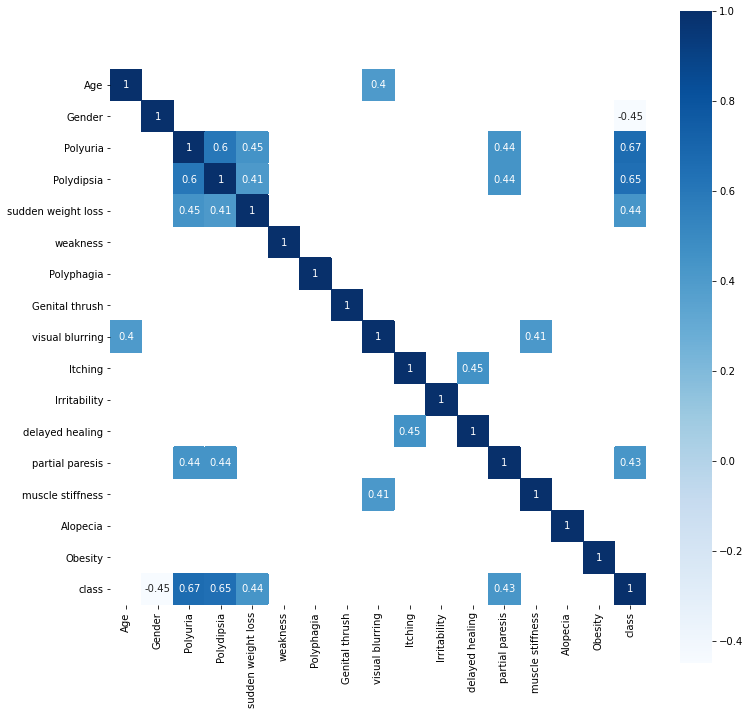

In [57]:
corr_data = df.corr()
plt.subplots(figsize=(12,12))
mask1 = np.abs(corr_data) <= 0.4
mask2 = np.triu(np.ones_like(corr_data, dtype=bool))
mask = mask1 | mask2
sns.heatmap(corr_data, mask=mask1, annot=True, vmax=1, square=True, cmap="Blues")
plt.show()

Conclusion: 
1. 正负样本比例320:200=8:5，近似平衡样本，不需要处理；
2. 除年龄外，其余15个属性波动程度相近，年龄主要集中于中老年人；
3. 没有缺失值；
4. 按照是否得病绘制雷达图，指标为该类别属性的人数占该类别总人数的比例，如：得病总人数为320，得病人中患有体重增加属性的人有100人，则比例为100/320。由雷达图可知，polyuria、ploydipsia、sudden weight loss、irritability、partial paresis几种病应该与糖尿病有较紧密的联系，gender应该和以上呈现反比例，即女性更不容易患糖尿病；
5. 绘制相关性矩阵图，排除相关性绝对值在0.4以下的内容。可看出polyuria、ploydipsia和患病强相关，sudden weight loss、partial paresis和患病弱相关；gender和患病负相关；这些和4中的相吻合。还可看出，polyuria、ploydipsia一般同时存在的可能性较大

In [ ]:
要考虑是否也按照雷达图的方式，将相关性矩阵也分成两个部分绘制